<a href="https://colab.research.google.com/github/Luke-Dev-Tech/PytorchNotebooks/blob/main/Pytorch_2_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Device Config

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

In [ ]:
torch.__version__

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current Device: ", device)

Current Device:  cuda


# Classification With Pytorch

In [ ]:
# 1 data
n_samples = 1000

# this is from sklearn
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

print(X, " ", type(X))
print(y, " ", type(y))

print(len(X), len(y))

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]   <class 'numpy.ndarray'>
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0

In [ ]:
print(f"X[:5]: {X[:5]}") # 2 features of X
print(f"y[:5]: {y[:5]}") # label - 0 or 1 (Binary Classification)

X[:5]: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y[:5]: [1 1 1 1 0]


# This is nothing but just trying to display a table with the data.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                        "y":y })

circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


# Displaying Xs on the graph and colored by y.

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]   [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 

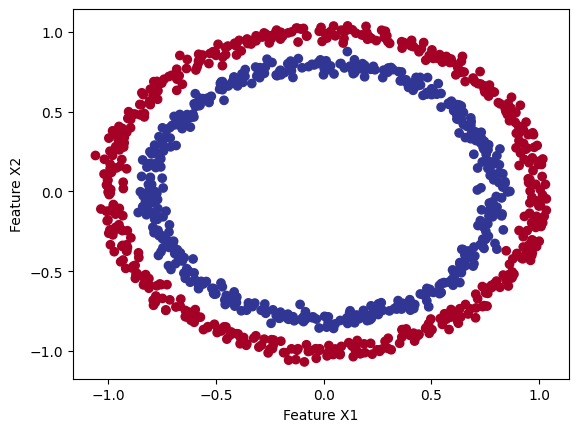

In [ ]:
set_amount = None
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")

# this is colored by Y 0 or 1
# 0 → dark red
# 1 → yellow
# 2 → blue
# cmap=plt.cm.RdYlBu means RED --> YELLOW --> BLUE
plt.scatter(X[:set_amount, 0], X[:set_amount, 1], c=y[:set_amount], cmap=plt.cm.RdYlBu)
print(X[:set_amount], " ", y[:set_amount])



# View the first example of features and labels



In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample} and the same for y: {y_sample}")
print(f"Sample label: {X_sample.shape} and the same for y: {y_sample.shape}")

Sample input features: [0.75424625 0.23148074] and the same for y: 1
Sample label: (2,) and the same for y: ()


# Trun data into tensors and create train and test splits

In [ ]:
# turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], X.shape, X.ndim, y[:5], y.shape, y.ndim


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 torch.Size([1000, 2]),
 2,
 tensor([1., 1., 1., 1., 0.]),
 torch.Size([1000]),
 1)

In [ ]:
# train_split using sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building a model
How will this perfrom?

y_pred = model_manual(X_train).squeeze()

This performs:



*   layer_1: (800,2) → (800,5)
*   layer_2: (800,5) → (800,1)
*   squeeze: → (800)







In [ ]:
# Send all to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

class ClassModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)


  def forward(self, x):
    return self.layer_2(self.layer_1(x))

torch.manual_seed(42)
model_manual = ClassModelV0().to(device) # send the model itself to device as well
model_manual.state_dict()



OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

# NN.Sequential Replication (Easier Way to creating NN)

But it has its ups and downs

In [ ]:
model_seq = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_seq.state_dict()




OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

## In fact; you could also do like this as well

In [ ]:
class ClassModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear = nn.Sequential(
         nn.Linear(in_features=2, out_features=5),
         nn.Linear(in_features=5, out_features=1)
    )

  def forward(self, x):
    return self.two_linear(x)

torch.manual_seed(42)
model_manual_v2 = ClassModelV1().to(device) # send the model itself to device as well
model_manual_v2.state_dict()

OrderedDict([('two_linear.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('two_linear.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('two_linear.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('two_linear.1.bias', tensor([-0.2060], device='cuda:0'))])

# Testing Before Training


In [ ]:
with torch.inference_mode():
  untrained_preds = model_manual(X_test)
print(f"Length of Predictions : {len(untrained_preds)}")
print(f"Shape of Predictions : {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
print(f"\nFirst 10 test labels: {y_test[:10]}")

# you see all of them are floats and i want them to be like lables.
# Let's use the round function.

Length of Predictions : 200
Shape of Predictions : torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

First 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


# Setting up Loss Function

which loss function should we use ?

Binary Classifcation ? --> Binary Cross Entropy

Logits = raw scores from the last layer
They are just numbers your model spits out before turning them into probabilities.

They can be:

* negative
* positive
* big
* small
* anything

Because they are not yet squished into 0–1

nn.BCEWithLogitsLoss() is basically like this

nn.Squantial{
    nn.Sigmoid(),
    nn.BCELoss()
}

In [ ]:
loss_fun = nn.BCEWithLogitsLoss() # this combines BCELoss() + Sigmoid()

optimizer = torch.optim.SGD(params=model_manual.parameters(), lr=0.1)

# Accuracy With Pytorch ? Crazy!!!!!

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# Before Train (Procedure intro)

procedure: raw logits --> prediction probabilities --> prediction labels

then we will convert those **logists** into **prediction probabilities** by passing them to some kind of activation function (sigmoid function)

In [ ]:
model_manual.eval()
with torch.inference_mode():
  y_logists = model_manual(X_test)
  y_pred_probs = torch.sigmoid(y_logists)
  y_pred_probs = torch.round(y_pred_probs)
  test_acc = accuracy_fn(y_test, y_pred_probs)

print(y_test[:5])
print(y_pred_probs[:5])
print(f"Test Accuracy: {test_acc}%") # WTF?

tensor([1., 0., 1., 0., 1.], device='cuda:0')
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
Test Accuracy: 10000.0%


# Train

In [ ]:
y_train.ndim

1

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_manual.train()

  # forward pass
  y_logits = model_manual(X_train)
  y_logits = y_logits.squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss
  loss = loss_fun(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer
  optimizer.zero_grad()
  loss.backward() # Backpropagation
  optimizer.step()


  model_manual.eval()
  with torch.inference_mode():
    test_logits = model_manual(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fun(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69569 | Acc: 50.00% | Test Loss: 0.69721 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.69403 | Acc: 50.00% | Test Loss: 0.69615 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69343 | Acc: 46.00% | Test Loss: 0.69585 | Test Acc: 48.50%
Epoch: 30 | Loss: 0.69321 | Acc: 49.00% | Test Loss: 0.69577 | Test Acc: 47.50%
Epoch: 40 | Loss: 0.69312 | Acc: 49.50% | Test Loss: 0.69573 | Test Acc: 46.50%
Epoch: 50 | Loss: 0.69308 | Acc: 50.38% | Test Loss: 0.69569 | Test Acc: 46.50%
Epoch: 60 | Loss: 0.69306 | Acc: 50.50% | Test Loss: 0.69564 | Test Acc: 46.50%
Epoch: 70 | Loss: 0.69305 | Acc: 50.50% | Test Loss: 0.69559 | Test Acc: 46.50%
Epoch: 80 | Loss: 0.69304 | Acc: 50.75% | Test Loss: 0.69553 | Test Acc: 46.50%
Epoch: 90 | Loss: 0.69303 | Acc: 50.38% | Test Loss: 0.69547 | Test Acc: 46.50%
Epoch: 100 | Loss: 0.69302 | Acc: 50.50% | Test Loss: 0.69542 | Test Acc: 46.50%
Epoch: 110 | Loss: 0.69302 | Acc: 50.62% | Test Loss: 0.69537 | Test Acc: 46.00%
Epoch: 120 | Loss: 0.69301 | Acc: 50.62

# Visuals because our model isn't learning anything

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


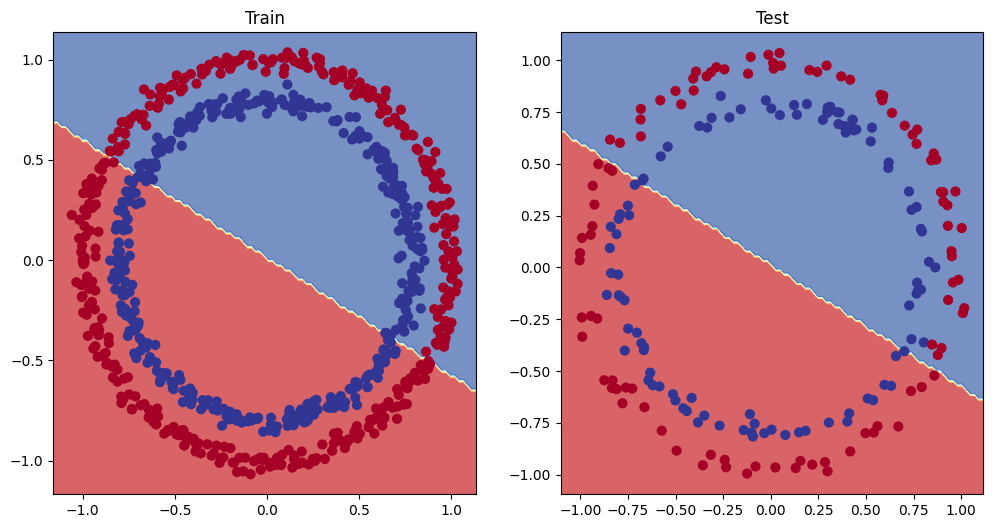

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_manual, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_manual, X_test, y_test)

# Since it isn't learning is it even working?

let's find out by
 adding more layers with a few more epochs



In [ ]:
def plot_predictions(train_data=X_train,
                       train_labels=y_train,
                       test_data=X_test,
                       test_labels=y_test,
                       predictions=None):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, s=4, c="b", label="Training data")
    plt.scatter(test_data, test_labels, s=4, c="g", label="Testing data")
    if predictions is not None:
      plt.scatter(test_data, predictions, s=4, c="r", label="Predictions")
    plt.legend(fontsize=14)
    plt.show()

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))



In [ ]:
model_1 = CircleModelV1().to(device)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
loss_fun_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_logits_1 = model_1(X_train).squeeze()
  y_pred_1 = torch.round(torch.sigmoid(y_logits_1))

  # calculate the loss

  loss_1 = loss_fun_1(y_logits_1, y_train)
  acc_1 = accuracy_fn(y_true=y_train, y_pred=y_pred_1)

  # optimizer zero grad
  optimizer_1.zero_grad()

  # loss backward
  loss_1.backward()

  # optimizer step step step
  optimizer_1.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits_1 = model_1(X_test).squeeze()
    test_pred_1 = torch.round(torch.sigmoid(test_logits_1))

    test_loss_1 = loss_fun_1(test_logits_1, y_test)
    test_acc_1 = accuracy_fn(y_true=y_test, y_pred=test_pred_1)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_1:.5f} | Acc: {acc_1:.2f}% | Test Loss: {test_loss_1:.5f} | Test Acc: {test_acc_1:.2f}%")



Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%


# Still not learning Why? let's put our model with other dummy data to linear model and see if it is working or not

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_dummy = torch.arange(start, end, step).unsqueeze(dim=1)
y_dummy = weight * X_dummy + bias

print(X_dummy.ndim, "", y_dummy.ndim)
print(X_dummy.shape, "", y_dummy.shape)

2  2
torch.Size([100, 1])  torch.Size([100, 1])


In [ ]:
split_index = int(len(X_dummy) * 0.8)
X_train_dummy, y_train_dummy = X_dummy[:split_index], y_dummy[:split_index]
X_test_dummy, y_test_dummy = X_dummy[split_index:], y_dummy[split_index:]

X_train_dummy, y_train_dummy = X_train_dummy.to(device), y_train_dummy.to(device)
X_test_dummy, y_test_dummy = X_test_dummy.to(device), y_test_dummy.to(device)

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV2().to(device)
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -

In [ ]:
loss_fun_2 = nn.L1Loss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

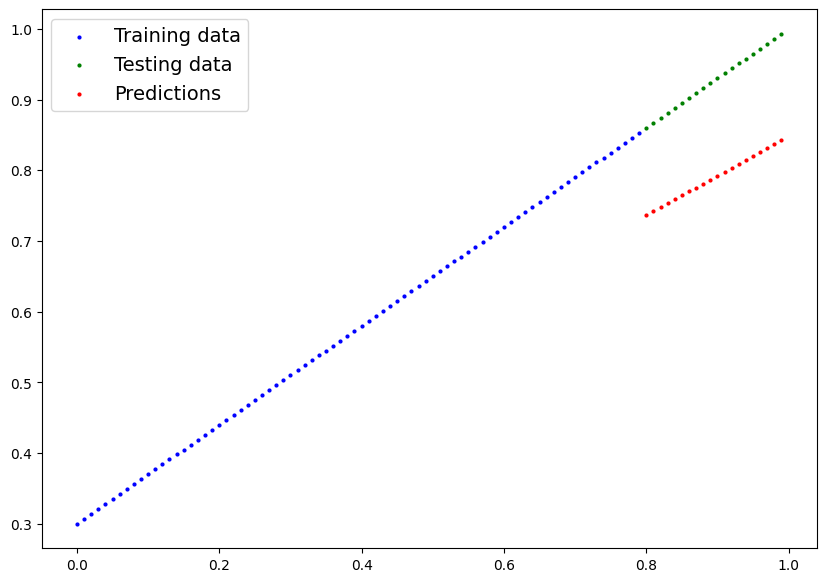

In [ ]:
for epoch in range(1000):
  model_2.train()

  # Forward Pass
  y_logits_2 = model_2(X_train_dummy)

  # Loss Calculation
  loss_2 = loss_fun_2(y_logits_2, y_train_dummy)

  optimizer_2.zero_grad()

  # loss backward
  loss_2.backward()

  # Optimizer step step step
  optimizer_2.step()


  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_dummy).squeeze()


plot_predictions(
    train_data=X_train_dummy.cpu(),
    train_labels=y_train_dummy.cpu(),
    test_data=X_test_dummy.cpu(),
    test_labels=y_test_dummy.cpu(),
    predictions=test_pred.cpu()
)



# Since our model works for linear regression

Let's move on to the non-linear ones
for non-linear algorithmn, nn.ReLU() will be utilized.

# The NON-Linear Classification

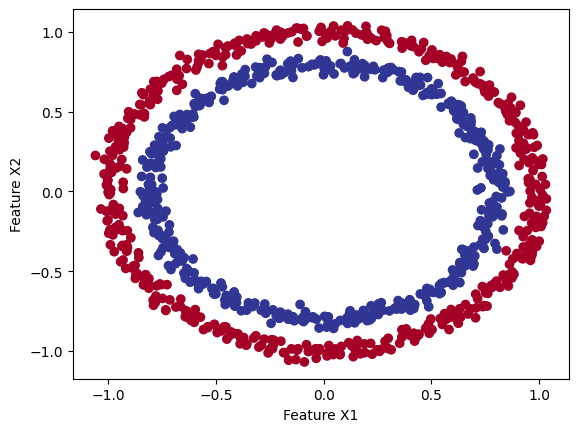

In [ ]:
# This is just recreating non-linear data from previous one
set_amount = None
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")

# this is colored by Y 0 or 1
# 0 → dark red
# 1 → yellow
# 2 → blue
# cmap=plt.cm.RdYlBu means RED --> YELLOW --> BLUE
plt.scatter(X[:set_amount, 0], X[:set_amount, 1], c=y[:set_amount], cmap=plt.cm.RdYlBu)



In [ ]:
# train_split using sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV3().to(device)


In [ ]:
loss_fun_3 = nn.BCEWithLogitsLoss()
optimizer_3 = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  # Forward pass
  y_logits_3 = model_3(X_train).squeeze()
  y_pred_3 = torch.round(torch.sigmoid(y_logits_3))

  # calculate the loss

  loss_3 = loss_fun_3(y_logits_3, y_train)
  acc_3 = accuracy_fn(y_true=y_train, y_pred=y_pred_3)

  # optimizer zero grad
  optimizer_3.zero_grad()

  # loss backward
  loss_3.backward()

  # optimizer step step step
  optimizer_3.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits_3 = model_3(X_test).squeeze()
    test_pred_3 = torch.round(torch.sigmoid(test_logits_3))

    if(epoch % 100 == 0):
      test_loss_3 = loss_fun_3(test_logits_3, y_test)
      test_acc_3 = accuracy_fn(y_true=y_test, y_pred=test_pred_3)
      print(f"Epoch: {epoch} | Loss: {loss_3:.5f} | Acc: {acc_3:.2f}% | Test Loss: {test_loss_3:.5f} | Test Acc: {test_acc_3:.2f}%")


Epoch: 0 | Loss: 0.69541 | Acc: 50.00% | Test Loss: 0.69584 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69015 | Acc: 53.12% | Test Loss: 0.69060 | Test Acc: 50.00%
Epoch: 200 | Loss: 0.68791 | Acc: 54.25% | Test Loss: 0.68762 | Test Acc: 54.50%
Epoch: 300 | Loss: 0.68421 | Acc: 58.88% | Test Loss: 0.68343 | Test Acc: 59.00%
Epoch: 400 | Loss: 0.67898 | Acc: 62.25% | Test Loss: 0.67833 | Test Acc: 64.50%
Epoch: 500 | Loss: 0.67115 | Acc: 64.00% | Test Loss: 0.67120 | Test Acc: 67.50%
Epoch: 600 | Loss: 0.65742 | Acc: 72.00% | Test Loss: 0.65936 | Test Acc: 69.50%
Epoch: 700 | Loss: 0.63149 | Acc: 85.12% | Test Loss: 0.63744 | Test Acc: 84.00%
Epoch: 800 | Loss: 0.58168 | Acc: 91.88% | Test Loss: 0.59477 | Test Acc: 91.50%
Epoch: 900 | Loss: 0.49246 | Acc: 93.88% | Test Loss: 0.51760 | Test Acc: 93.50%


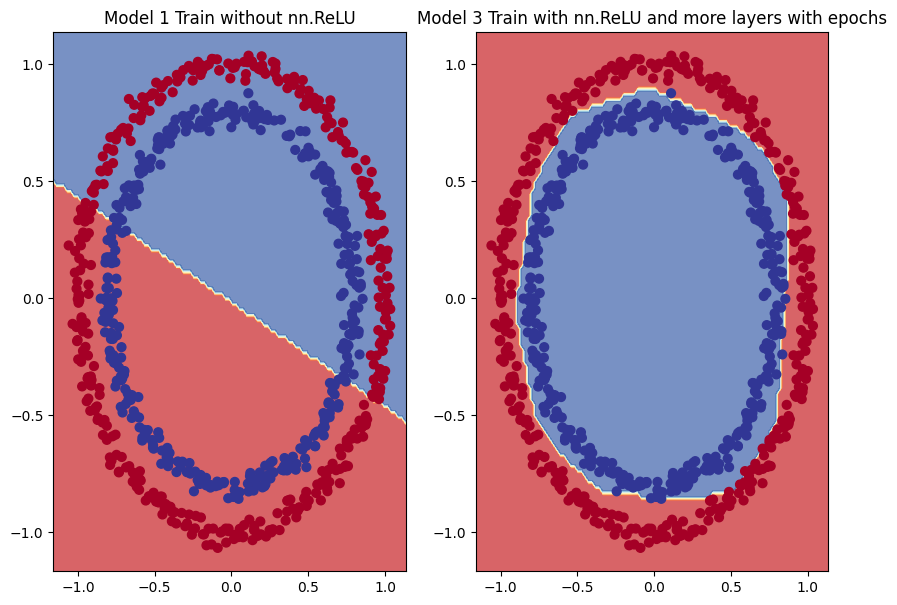

In [ ]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Model 1 Train without nn.ReLU")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 3 Train with nn.ReLU and more layers with epochs")
plot_decision_boundary(model_3, X_train, y_train)

# Multiclass Classification

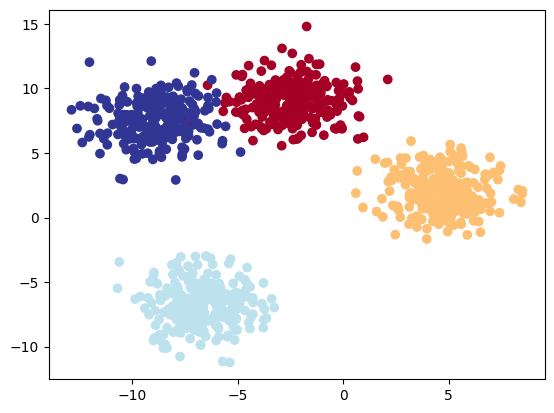

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


# n_features -> X features
# centers -> y labels
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Train Test Split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
class BlobModelV1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_manual_v2 = BlobModelV1(input_features=2, output_features=4, hidden_units=8).to(device)

In [ ]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_manual_v2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

  model_manual_v2.train()

  # Forward pass
  y_logits = model_manual_v2(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Loss
  loss = loss_fun(y_logits, y_blob_train.long())
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  # Optizer Zero grad

  optimizer.zero_grad()


  # Loss backward()
  loss.backward()

  # optimizer step step step
  optimizer.step()

  model_manual_v2.eval()
  with torch.inference_mode():
    test_logits = model_manual_v2(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fun(test_logits, y_blob_test.long())
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.02045 | Acc: 99.50% | Test Loss: 0.00920 | Test Acc: 99.50%
Epoch: 100 | Loss: 0.02030 | Acc: 99.50% | Test Loss: 0.00906 | Test Acc: 99.50%
Epoch: 200 | Loss: 0.02015 | Acc: 99.50% | Test Loss: 0.00892 | Test Acc: 99.50%
Epoch: 300 | Loss: 0.02001 | Acc: 99.50% | Test Loss: 0.00879 | Test Acc: 99.50%
Epoch: 400 | Loss: 0.01987 | Acc: 99.50% | Test Loss: 0.00865 | Test Acc: 99.50%
Epoch: 500 | Loss: 0.01973 | Acc: 99.50% | Test Loss: 0.00852 | Test Acc: 99.50%
Epoch: 600 | Loss: 0.01960 | Acc: 99.50% | Test Loss: 0.00839 | Test Acc: 99.50%
Epoch: 700 | Loss: 0.01946 | Acc: 99.50% | Test Loss: 0.00826 | Test Acc: 99.50%
Epoch: 800 | Loss: 0.01934 | Acc: 99.50% | Test Loss: 0.00814 | Test Acc: 99.50%
Epoch: 900 | Loss: 0.01921 | Acc: 99.50% | Test Loss: 0.00802 | Test Acc: 99.50%


In [ ]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_manual_v2, X_blob_train, y_blob_train)